<a href="https://colab.research.google.com/github/JALVITO/CE888/blob/master/Labs/Lab_7/Lab_7_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.4.3'

In [1]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [2]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Using word-embeddings 

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN layers

In [5]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 61s 367ms/step - loss: 0.6568 - acc: 0.5931 - val_loss: 0.4958 - val_acc: 0.7626
Epoch 2/10
157/157 [==============================] - 59s 374ms/step - loss: 0.4158 - acc: 0.8300 - val_loss: 0.3870 - val_acc: 0.8344
Epoch 3/10
157/157 [==============================] - 56s 358ms/step - loss: 0.2789 - acc: 0.8918 - val_loss: 

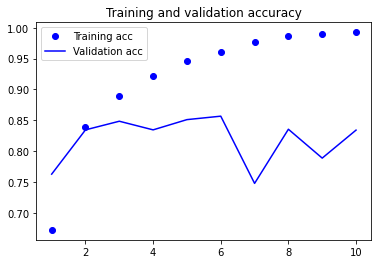

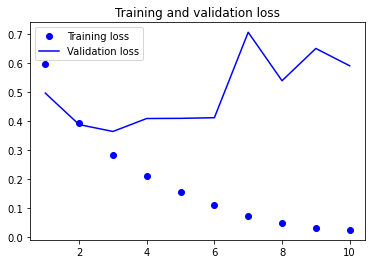

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Training the model with Embedding and SimpleRNN layers

In [7]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 34s 30ms/step - loss: 0.5963 - acc: 0.6781 - val_loss: 0.3750 - val_acc: 0.8450
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 0.2966 - acc: 0.8881 - val_loss: 0.2866 - val_acc: 0.8854
Epoch 3/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2322 - acc: 0.9131 - val_loss: 0.4293 - val_acc: 0.8390
Epoch 4/10
157/157 [==============================] - 5s 29ms/step - loss: 0.1968 - acc: 0.9298 - val_loss: 0.3081 - val_acc: 0.8858
Epoch 5/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1684 - acc: 0.9399 - val_loss: 0.3094 - val_acc: 0.8822
Epoch 6/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1578 - acc: 0.9437 - val_loss: 0.3115 - val_acc: 0.8848
Epoch 7/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1343 - acc: 0.9531 - val_loss: 0.3731 - val_acc: 0.8674
Epoch 8/10
157/157 [==============================] - 4s 28ms/step -

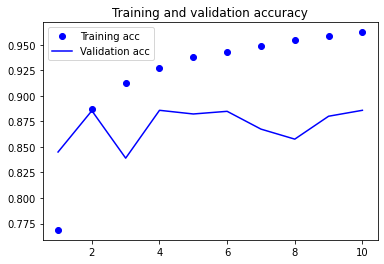

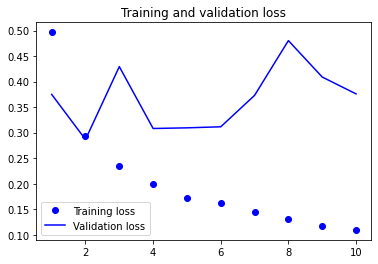

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Task 3: 

Please consider this Time Series Prediction with LSTM Recurrent Neural Networks. We can see that the LSTM model in the code below has an average error of about 23 passengers (in thousands) on the training dataset, and about 53 passengers (in thousands) on the test dataset. Not that bad. Can you please improve the performance?

#### Dataset Discription
The problem we are going to look at in this post is the International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.



Epoch 1/100
94/94 - 1s - loss: 0.0338
Epoch 2/100
94/94 - 0s - loss: 0.0152
Epoch 3/100
94/94 - 0s - loss: 0.0119
Epoch 4/100
94/94 - 0s - loss: 0.0109
Epoch 5/100
94/94 - 0s - loss: 0.0101
Epoch 6/100
94/94 - 0s - loss: 0.0091
Epoch 7/100
94/94 - 0s - loss: 0.0082
Epoch 8/100
94/94 - 0s - loss: 0.0073
Epoch 9/100
94/94 - 0s - loss: 0.0065
Epoch 10/100
94/94 - 0s - loss: 0.0056
Epoch 11/100
94/94 - 0s - loss: 0.0050
Epoch 12/100
94/94 - 0s - loss: 0.0044
Epoch 13/100
94/94 - 0s - loss: 0.0037
Epoch 14/100
94/94 - 0s - loss: 0.0033
Epoch 15/100
94/94 - 0s - loss: 0.0029
Epoch 16/100
94/94 - 0s - loss: 0.0026
Epoch 17/100
94/94 - 0s - loss: 0.0024
Epoch 18/100
94/94 - 0s - loss: 0.0023
Epoch 19/100
94/94 - 0s - loss: 0.0022
Epoch 20/100
94/94 - 0s - loss: 0.0021
Epoch 21/100
94/94 - 0s - loss: 0.0022
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0021
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0021
Epoch 26/100
94/94 - 0s - loss: 0.

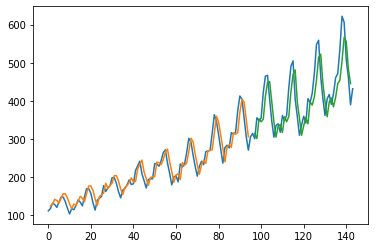

In [9]:
import numpy
import math
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
19/19 - 1s - loss: 0.0488
Epoch 2/100
19/19 - 0s - loss: 0.0374
Epoch 3/100
19/19 - 0s - loss: 0.0295
Epoch 4/100
19/19 - 0s - loss: 0.0236
Epoch 5/100
19/19 - 0s - loss: 0.0194
Epoch 6/100
19/19 - 0s - loss: 0.0165
Epoch 7/100
19/19 - 0s - loss: 0.0150
Epoch 8/100
19/19 - 0s - loss: 0.0141
Epoch 9/100
19/19 - 0s - loss: 0.0136
Epoch 10/100
19/19 - 0s - loss: 0.0132
Epoch 11/100
19/19 - 0s - loss: 0.0128
Epoch 12/100
19/19 - 0s - loss: 0.0124
Epoch 13/100
19/19 - 0s - loss: 0.0121
Epoch 14/100
19/19 - 0s - loss: 0.0117
Epoch 15/100
19/19 - 0s - loss: 0.0113
Epoch 16/100
19/19 - 0s - loss: 0.0109
Epoch 17/100
19/19 - 0s - loss: 0.0105
Epoch 18/100
19/19 - 0s - loss: 0.0101
Epoch 19/100
19/19 - 0s - loss: 0.0097
Epoch 20/100
19/19 - 0s - loss: 0.0092
Epoch 21/100
19/19 - 0s - loss: 0.0088
Epoch 22/100
19/19 - 0s - loss: 0.0085
Epoch 23/100
19/19 - 0s - loss: 0.0081
Epoch 24/100
19/19 - 0s - loss: 0.0077
Epoch 25/100
19/19 - 0s - loss: 0.0074
Epoch 26/100
19/19 - 0s - loss: 0.

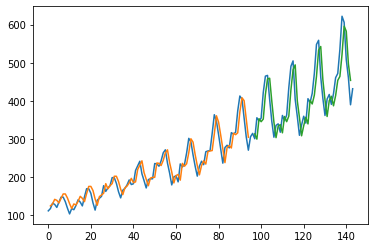

In [87]:
from keras.layers import Dropout

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(3, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()